In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


C:\Users\maahi\PycharmProjects\JupyterProject\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

pred = model.predict(x_test)
print("Predicted:", np.argmax(pred[0]), "Actual:", y_test[0])

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4667 - loss: 5.1510 - val_accuracy: 0.6871 - val_loss: 1.0649
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6344 - loss: 1.2298 - val_accuracy: 0.7881 - val_loss: 0.7495
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7250 - loss: 0.9504 - val_accuracy: 0.8558 - val_loss: 0.5506
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7861 - loss: 0.7503 - val_accuracy: 0.9083 - val_loss: 0.3944
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8223 - loss: 0.6353 - val_accuracy: 0.9155 - val_loss: 0.3333
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.5490 - val_accuracy: 0.9254 - val_loss: 0.3016
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8661 - loss: 0.4887 - val_accuracy: 0.9308 - val_loss: 0.2849
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8782 - loss: 0.4443 - val_accuracy: 0.

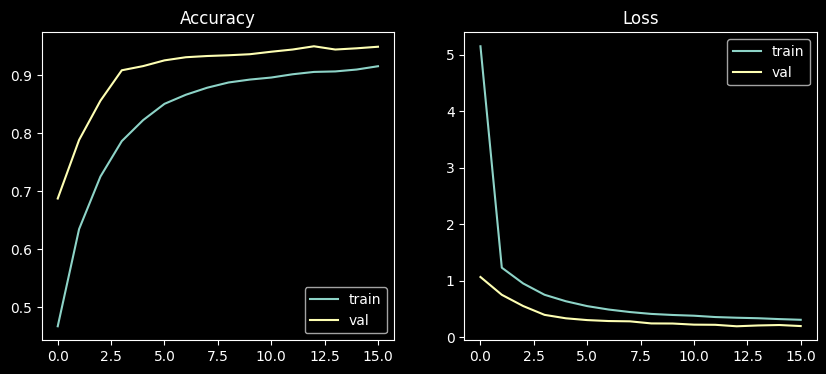

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.show()